# We need to scrape schools social media on their offical website 

In [6]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import re

In [7]:
url = "https://www.stevens.edu/"
url_2 = "https://www.hostos.cuny.edu"

# Case1: Most schools have their social media URL at first page, in the href under a tag
# We can simply scrape this page 

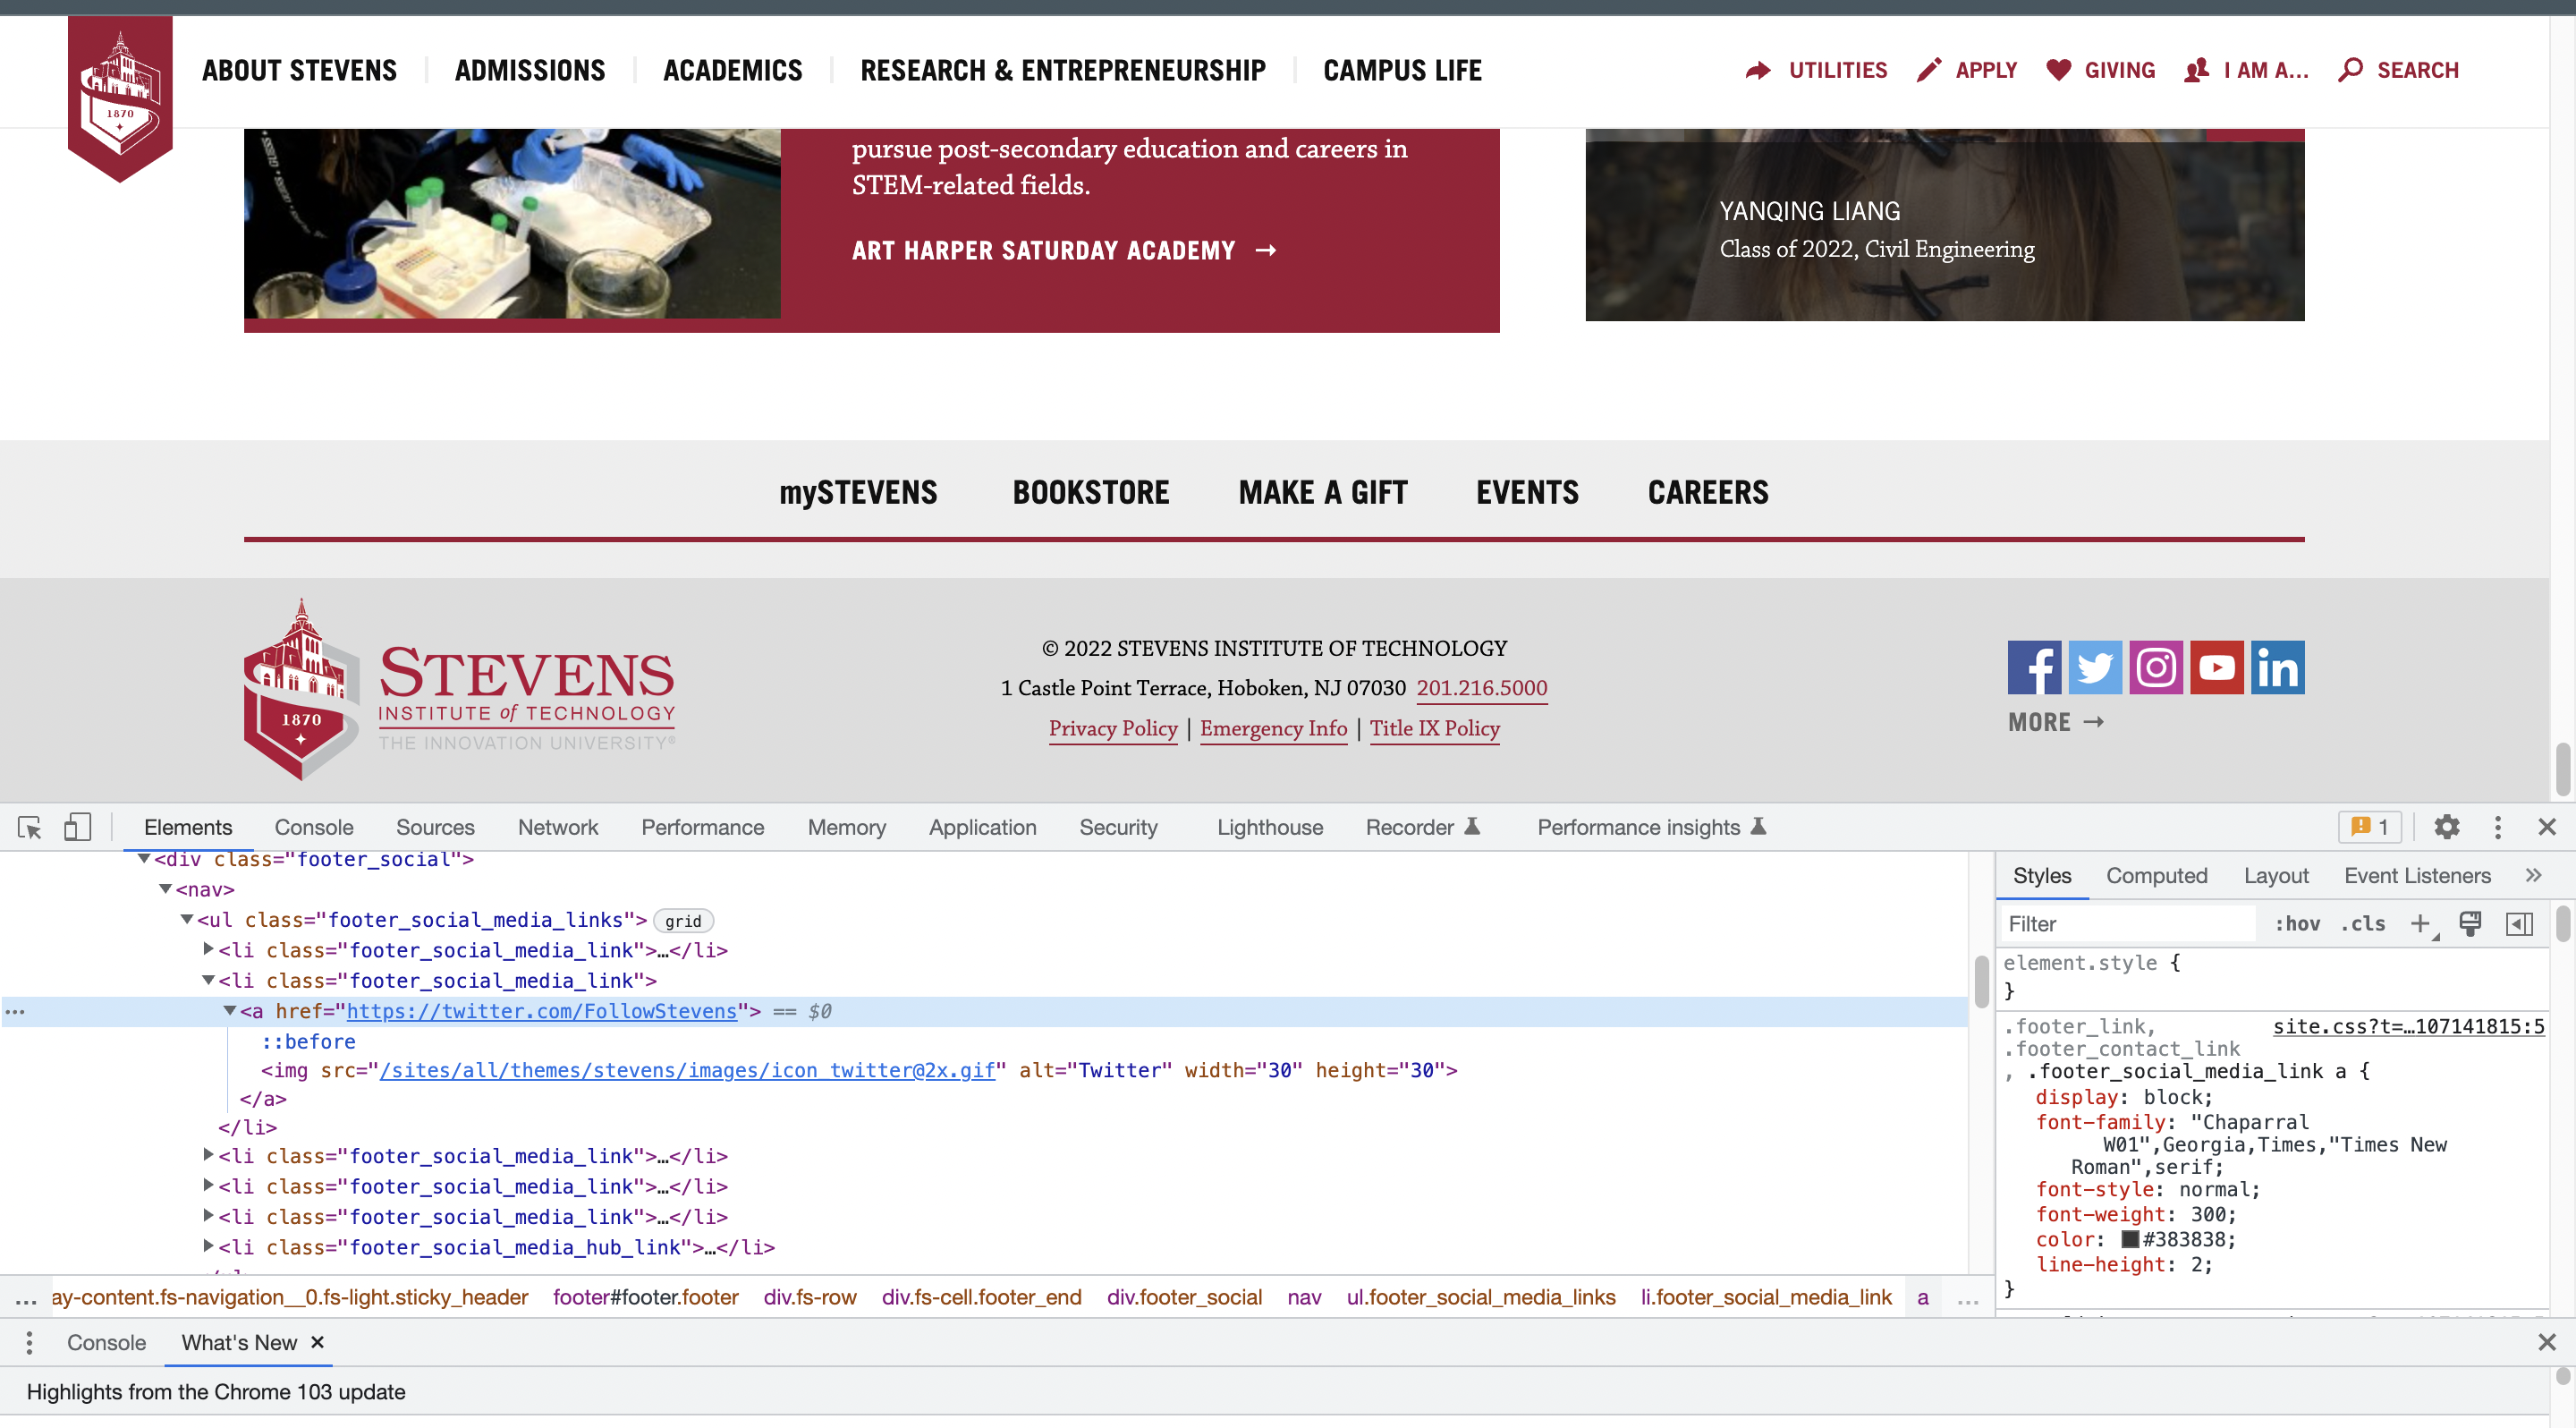

In [8]:
def find_weird_schools1(url): 
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    a_tags = soup.find_all("a")
    for i in a_tags:
        text = str(i).lower()
        finded=re.findall("twitter", text)
        if finded != []:
            info = i["href"]
    return info

In [9]:
find_weird_schools1(url)

'https://twitter.com/FollowStevens'

# However, There is just a hyper link in a href tag for some school
# In this situation, we need to add home page with hyper link,to get next pager with actual social media link

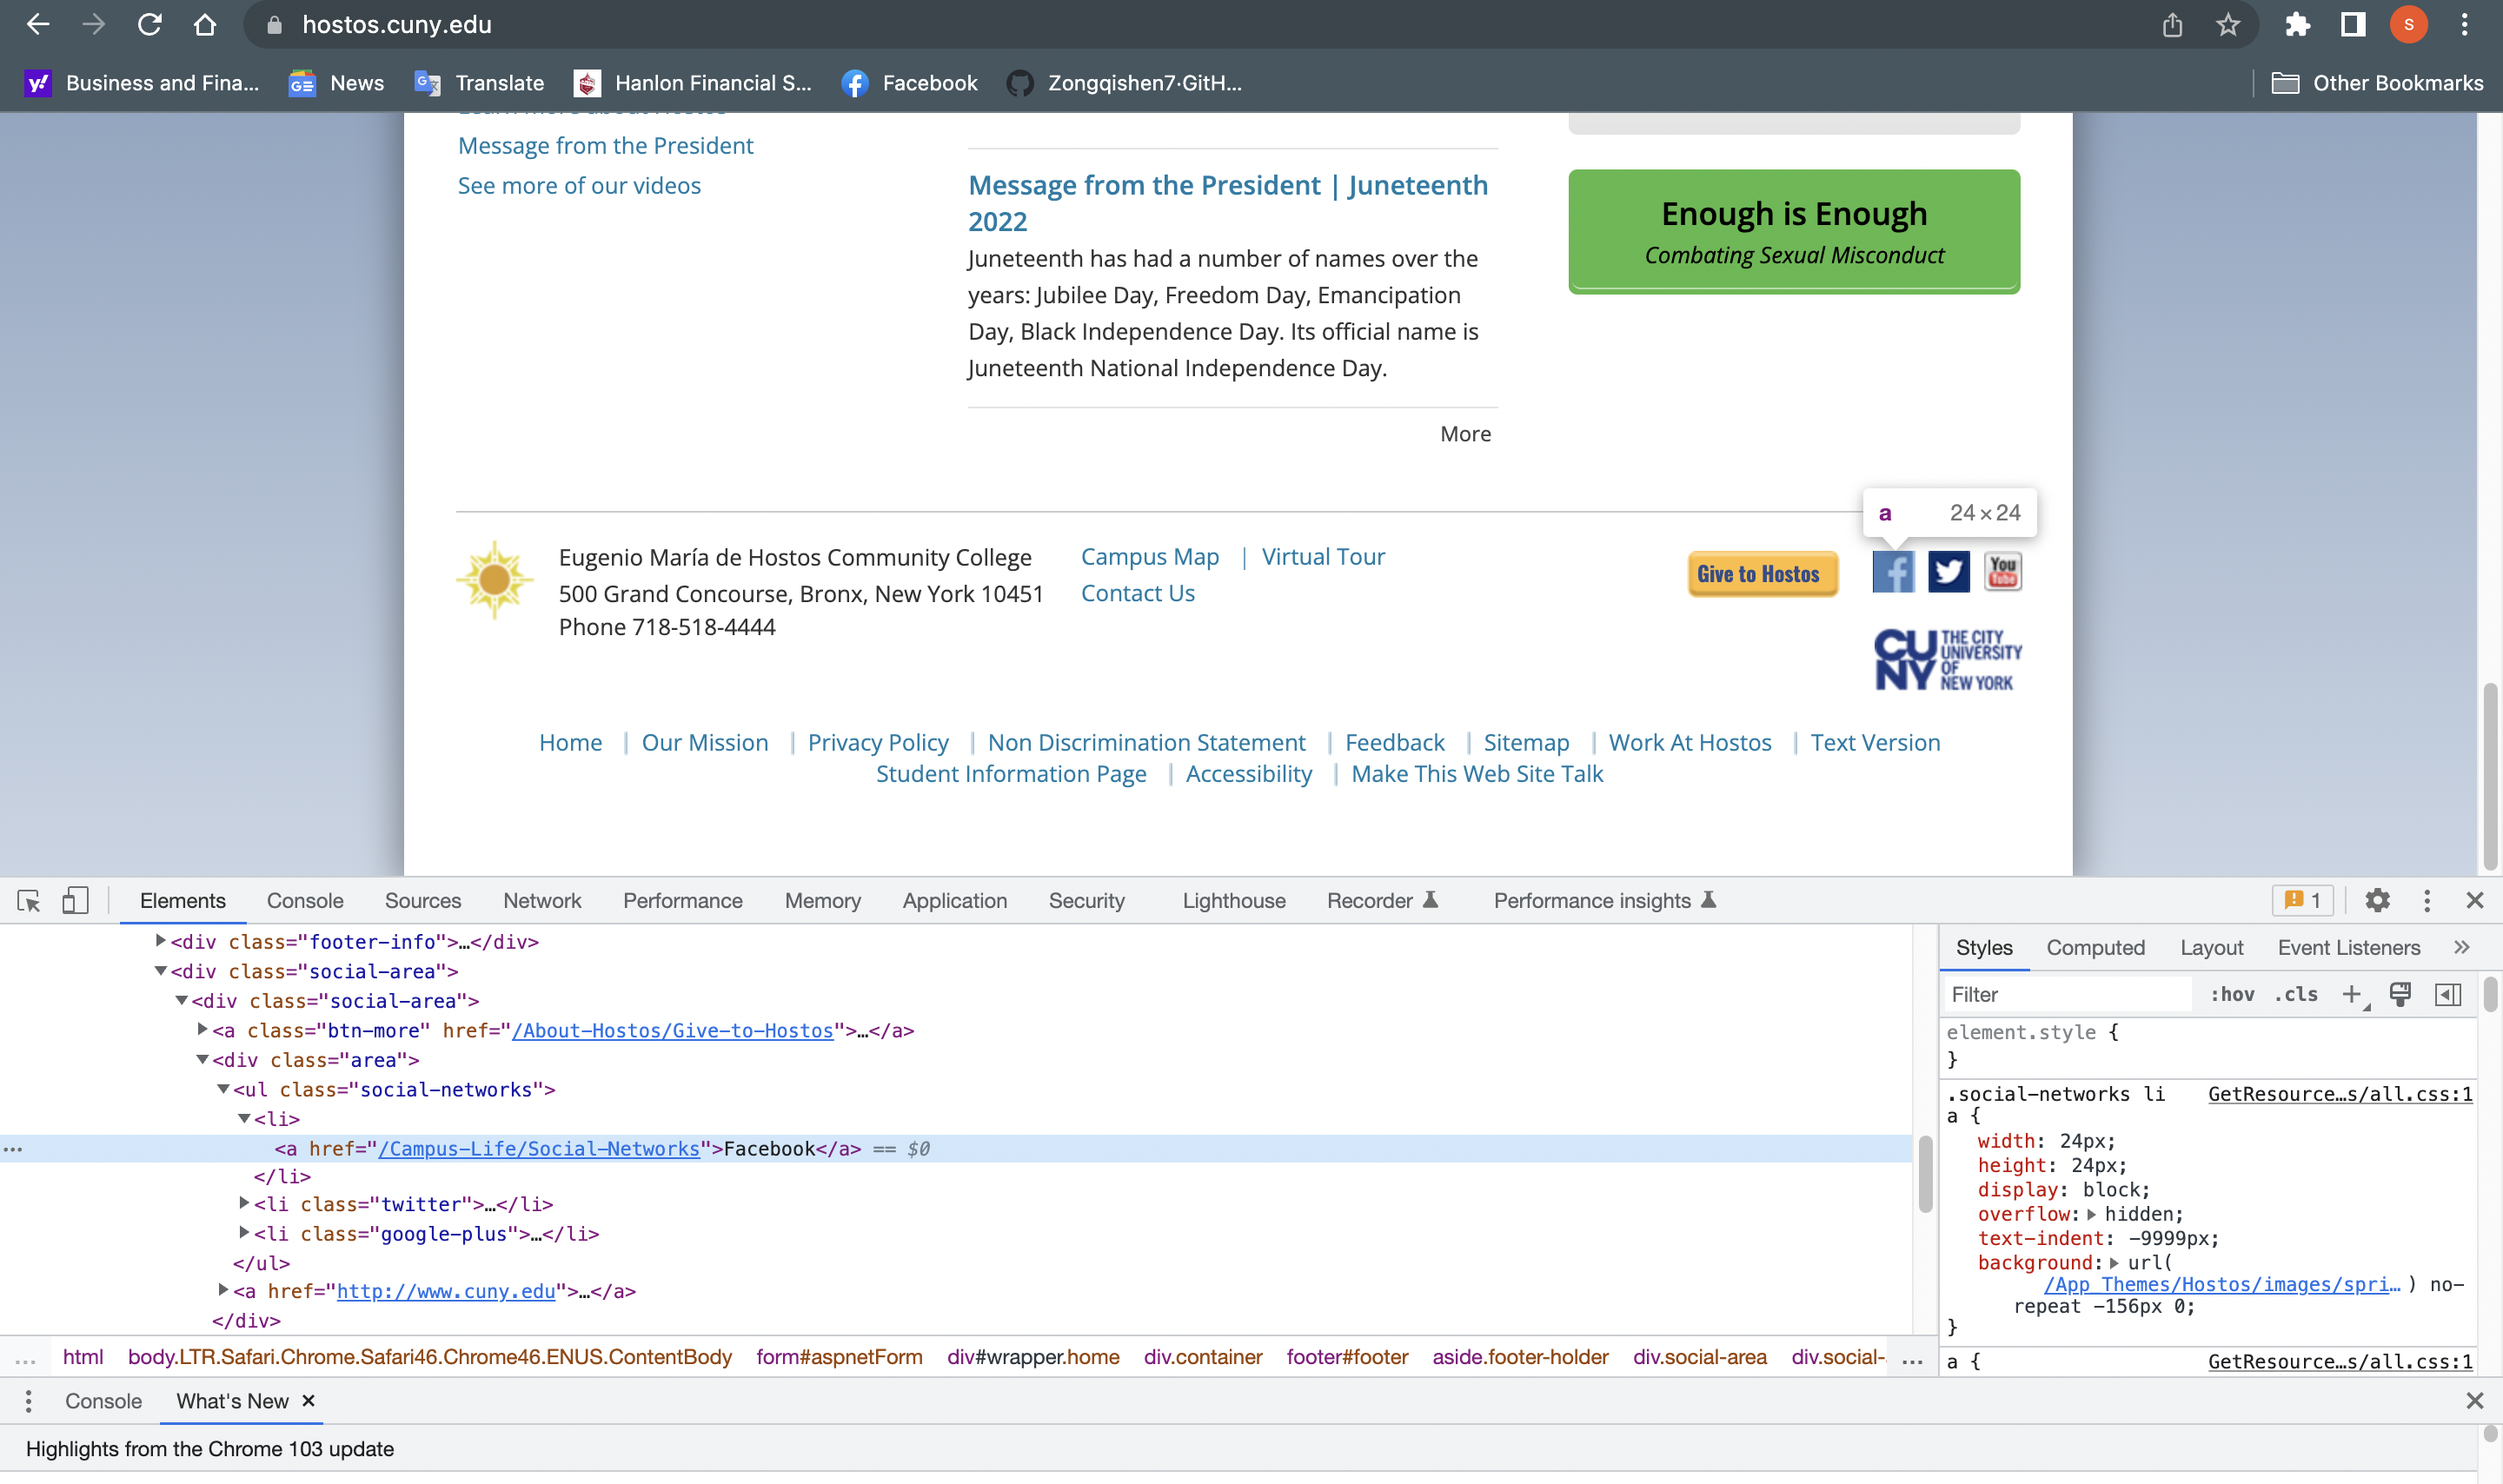

https://www.hostos.cuny.edu/Campus-Life/Social-Networks

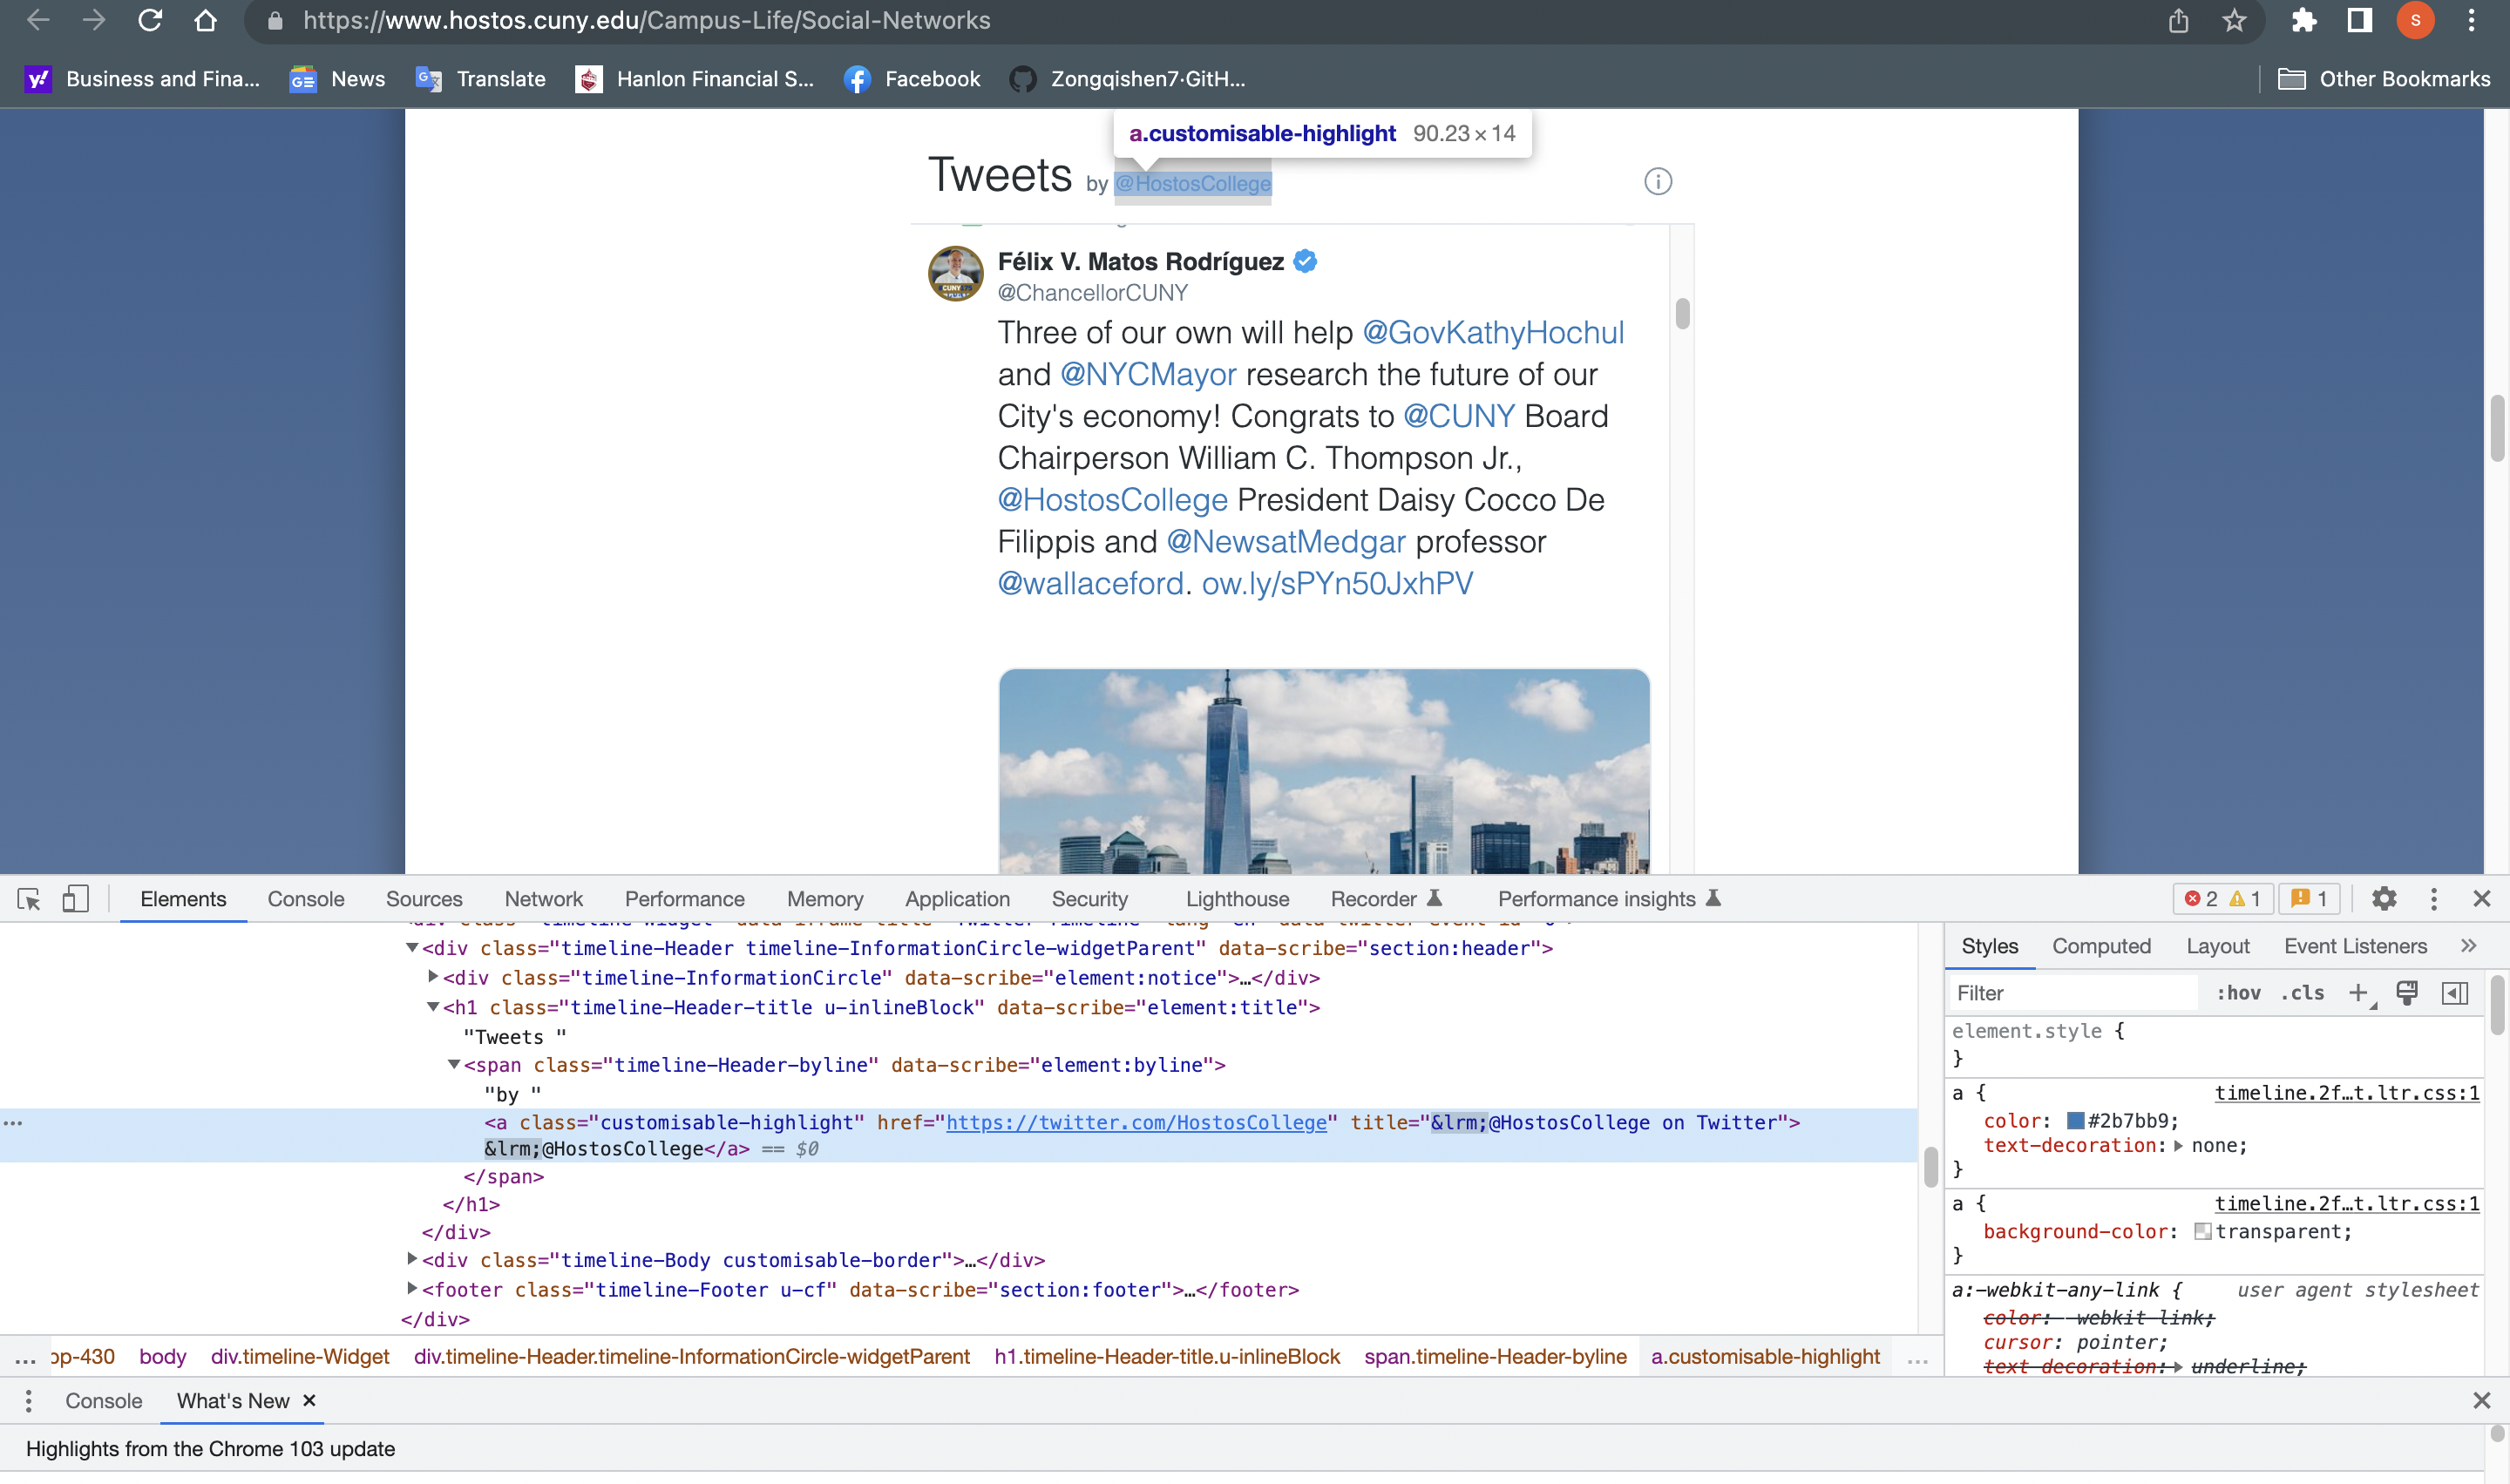

# we can try link in <a herf tag in host page fist, if it works then return this link. If it doesn't work, then we use host page + hyper link which is link :(url+info), here we get url using same way with Previous one. 

In [52]:
def find_weird_schools(url): 
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    a_tags = soup.find_all("a")
    for i in a_tags:
        text = str(i).lower()
        finded=re.findall("twitter", text)
        if finded != []:
            info = i["href"]
    try: 
      requests.get(info)
      return info
    except:
      print("An exception occurred")
      link = (url+info)
      response_2 = requests.get(link)
      soup_2 = BeautifulSoup(response_2.content, "html.parser")
      a_tags_2 = soup_2.find_all("a")
      for i in a_tags_2:
          text_2 = str(i).lower()
          finded_2 = re.findall("twitter.com", text_2)
          if finded_2 != []:
              return  i["href"]


In [53]:
find_weird_schools(url)

'https://twitter.com/FollowStevens'

In [54]:
find_weird_schools(url_2)

An exception occurred


'https://twitter.com/HostosCollege?ref_src=twsrc%5Etfw'